In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/marketing_campaign_dataset.csv")

In [3]:
df_1 = df.copy()

In [4]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [5]:
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [6]:
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [7]:
df.describe(include='object')

,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Acquisition_Cost,Location,Language,Customer_Segment,Date
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,5,5,5,4,6,15001,5,5,5,365
top,TechCorp,Influencer,Men 18-24,30 days,Email,"$16,578.00",Miami,Mandarin,Foodies,2021-12-02
freq,40237,40169,40258,50255,33599,32,40269,40255,40208,548


In [ ]:
sns.boxplot(y= "Clicks",data = df)
plt.show()

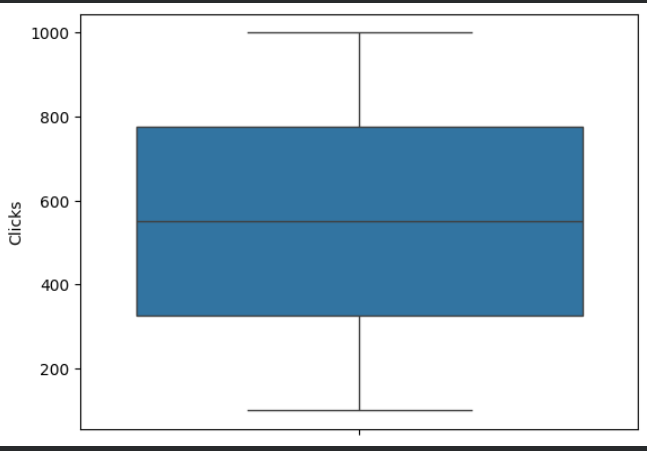

In [ ]:
sns.boxplot(y= "Impressions",data = df)
plt.show()

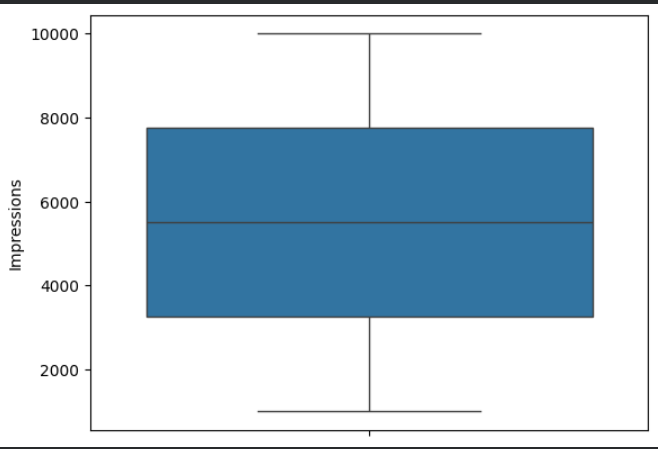

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.dtypes

,0
Campaign_ID,int64
Company,object
Campaign_Type,object
Target_Audience,object
Duration,object
Channel_Used,object
Conversion_Rate,float64
Acquisition_Cost,object
ROI,float64
Location,object


In [10]:
df['Acquisition_Cost']=df['Acquisition_Cost'].str.replace('$','')
df['Acquisition_Cost']=df['Acquisition_Cost'].str.replace(',','')

In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [29]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [12]:
df.columns

Index(['campaign_id', 'company', 'campaign_type', 'target_audience',
       'duration', 'channel_used', 'conversion_rate', 'acquisition_cost',
       'roi', 'location', 'language', 'clicks', 'impressions',
       'engagement_score', 'customer_segment', 'date'],
      dtype='object')

In [13]:
df['ctr'] = ((df['clicks']/df['impressions'])*100).round(2)

In [14]:
df['acquisition_cost'] = pd.to_numeric(df['acquisition_cost'])
df['cpc'] = (df['acquisition_cost'] / df['clicks'])

In [15]:
df['cpm'] = (df['acquisition_cost'] / df['impressions']) * 1000

In [17]:
df['target_audience'].unique()

array(['Men 18-24', 'Women 35-44', 'Men 25-34', 'All Ages', 'Women 25-34'],
      dtype=object)

In [19]:
def split_audience(val):
    if val == 'All Ages':
        return 'All', 0, 100
    elif 'Men' in val:
        gender = 'Men'
    else:
        gender = 'Women'

    # Extract numbers like '18-24'
    age_range = val.split(' ')[1].split('-')
    return gender, int(age_range[0]), int(age_range[1])

# Apply to your dataframe
df[['Gender', 'Age_Min', 'Age_Max']] = df['target_audience'].apply(
    lambda x: pd.Series(split_audience(x))
)

In [30]:
df.columns

Index(['campaign_id', 'company', 'campaign_type', 'target_audience',
       'duration', 'channel_used', 'conversion_rate', 'acquisition_cost',
       'roi', 'location', 'language', 'clicks', 'impressions',
       'engagement_score', 'customer_segment', 'date', 'ctr', 'cpc', 'cpm',
       'gender', 'age_min', 'age_max'],
      dtype='object')

In [27]:
df['Age_Max'] = df['Age_Max'].astype(str).str.lower()


In [31]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['quarter'] = df['date'].dt.quarter

In [33]:
df.columns

Index(['campaign_id', 'company', 'campaign_type', 'target_audience',
       'duration', 'channel_used', 'conversion_rate', 'acquisition_cost',
       'roi', 'location', 'language', 'clicks', 'impressions',
       'engagement_score', 'customer_segment', 'date', 'ctr', 'cpc', 'cpm',
       'gender', 'age_min', 'age_max', 'year', 'month', 'day', 'day_name',
       'quarter'],
      dtype='object')